In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
from PIL import Image
import numpy as np
%matplotlib inline

In [2]:
import torch
from torchvision import datasets, transforms, models
data_root = "/home/pml_09/data/"

# Coco dataset

In [3]:
coco_train = datasets.CocoDetection(root = data_root+'coco/train2017',
                                    annFile = data_root+'coco/annotations/instances_train2017.json')
coco_val = datasets.CocoDetection(root = data_root+'coco/val2017',
                                    annFile = data_root+'coco/annotations/instances_val2017.json')
print('Num of training images:', len(coco_train))
print('Num of validation images:', len(coco_val))

with open(data_root+'coco/annotations/coco-labels-paper.txt', 'r') as f:
    coco_labels = f.read().splitlines() 

loading annotations into memory...
Done (t=21.52s)
creating index...
index created!
loading annotations into memory...
Done (t=0.73s)
creating index...
index created!
Num of training images: 118287
Num of validation images: 5000


## Example of training data

<Figure size 432x288 with 0 Axes>

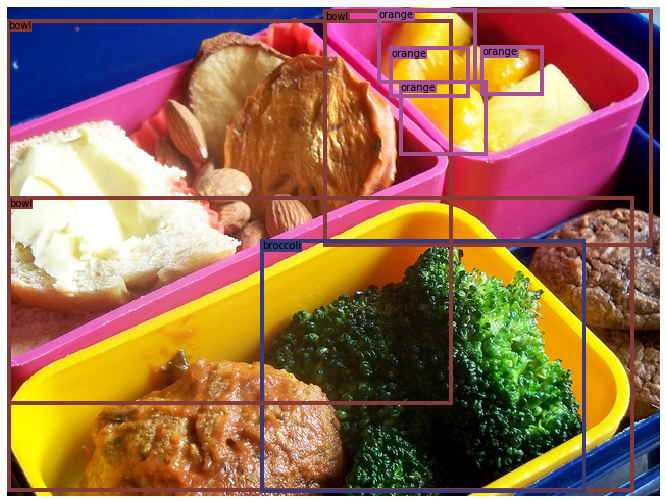

In [5]:
train_image, train_label = coco_train[0]

train_bounding_boxes = np.zeros((len(train_label), len(train_label[0]['bbox'])))
for i, item in enumerate(train_label):
    train_bounding_boxes[i] = train_label[i]['bbox']

train_categories = np.zeros((len(train_label), 1))
for i, item in enumerate(train_label):
    train_categories[i] = train_label[i]['category_id']

# Get bounding box colors
num_class = len(train_categories)
colors = np.random.rand(num_class)
cmap = plt.get_cmap('tab20b')
bbox_colors = [cmap(i) for i in colors]
color = {}
    
img = np.array(train_image)
plt.figure()
fig, ax = plt.subplots(1, figsize=(12,9))
ax.imshow(img)

for box, cat in zip(train_bounding_boxes, train_categories):
    for el in bbox_colors: 
        if color.get(cat.item()) == None:
            color[cat.item()] = bbox_colors[0]
            bbox_colors.remove(bbox_colors[0])
    c = color.get(cat.item())
    
    bbox = patches.Rectangle((box[0],box[1]),box[2],box[3], linewidth=4, edgecolor=c, facecolor='none')
    ax.add_patch(bbox)
    plt.text(box[0],box[1], s=coco_labels[int(cat.item())-1], 
             color='black', verticalalignment='top', bbox={'color': c, 'pad': 0})

plt.axis('off')
plt.show()

# VOC 2007 Dataset

In [6]:
voc2007_train = datasets.VOCDetection(root = data_root, year='2007', image_set='train', download=False)
print('Num of training images:', len(voc2007_train))

Num of training images: 2501


<Figure size 432x288 with 0 Axes>

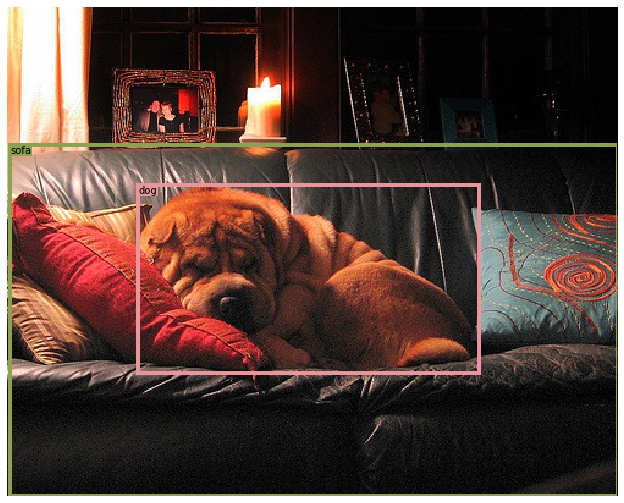

In [14]:
train_image, train_label = voc2007_train[29]

train_bounding_boxes = np.zeros((len(train_label['annotation']['object']), 4))
                                 #len(train_label['annotation']['object'][0]['bndbox'])))
train_categories = np.empty((len(train_label['annotation']['object']), 1), dtype='U10')

if type(train_label['annotation']['object']) is list:
    for i, el in enumerate(train_label['annotation']['object']):
        train_categories[i] = el['name']
        train_bounding_boxes[i] = list(el['bndbox'].values())
else:
    train_categories[0] = train_label['annotation']['object']['name']
    train_bounding_boxes[0] = list(train_label['annotation']['object']['bndbox'].values())

# Get bounding box colors
num_class = len(train_categories)
colors = np.random.rand(num_class)
cmap = plt.get_cmap('tab20b')
bbox_colors = [cmap(i) for i in colors]
color = {}

img = np.array(train_image)
plt.figure()
fig, ax = plt.subplots(1, figsize=(12,9))
ax.imshow(img)

for box, cat in zip(train_bounding_boxes, train_categories):
    for el in bbox_colors: 
        if color.get(cat.item()) == None:
            color[cat.item()] = bbox_colors[0]
            bbox_colors.remove(bbox_colors[0])
    c = color.get(cat.item())
    bbox = patches.Rectangle((box[0],box[1]), box[2]-box[0], box[3]-box[1],
                             linewidth=4, edgecolor=c, facecolor='none')
    ax.add_patch(bbox)
    plt.text(box[0],box[1], s=cat.item(), color='black', verticalalignment='top', bbox={'color': c, 'pad': 0})

plt.axis('off')
plt.show()

# VOC 2012 Dataset

In [8]:
voc2012_train = datasets.VOCDetection(root = data_root, year='2012', image_set='train', download=False)
print('Num of training images:', len(voc2007_train))

Num of training images: 2501


<Figure size 432x288 with 0 Axes>

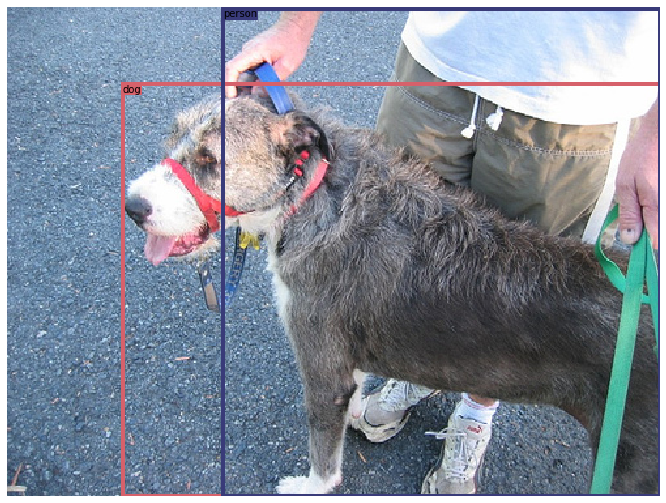

In [15]:
train_image, train_label = voc2012_train[79]

train_bounding_boxes = np.zeros((len(train_label['annotation']['object']), 4))
                                 #len(train_label['annotation']['object'][0]['bndbox'])))
train_categories = np.empty((len(train_label['annotation']['object']), 1), dtype='U10')

if type(train_label['annotation']['object']) is list:
    for i, el in enumerate(train_label['annotation']['object']):
        train_categories[i] = el['name']
        train_bounding_boxes[i] = list(el['bndbox'].values())
else:
    train_categories[0] = train_label['annotation']['object']['name']
    train_bounding_boxes[0] = list(train_label['annotation']['object']['bndbox'].values())

# Get bounding box colors
num_class = len(train_categories)
colors = np.random.rand(num_class)
cmap = plt.get_cmap('tab20b')
bbox_colors = [cmap(i) for i in colors]
color = {}

img = np.array(train_image)
plt.figure()
fig, ax = plt.subplots(1, figsize=(12,9))
ax.imshow(img)

for box, cat in zip(train_bounding_boxes, train_categories):
    for el in bbox_colors: 
        if color.get(cat.item()) == None:
            color[cat.item()] = bbox_colors[0]
            bbox_colors.remove(bbox_colors[0])
    c = color.get(cat.item())
    bbox = patches.Rectangle((box[0],box[1]), box[2]-box[0], box[3]-box[1],
                             linewidth=4, edgecolor=c, facecolor='none')
    ax.add_patch(bbox)
    plt.text(box[0],box[1], s=cat.item(), color='black', verticalalignment='top', bbox={'color': c, 'pad': 0})

plt.axis('off')
plt.show()

In [10]:
#device = torch.device('cpu')
#device = torch.device('cuda')